In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir

exp_path = '../experiments'

low_psi_path = exp_path + '/20240603-094003-RDK_n10_psi_0.01'
low_psi = float(low_psi_path.split('_')[-1])

high_psi_path = exp_path + '/20240604-092023-RDK_n10_psi_0.75'  
high_psi = float(high_psi_path.split('_')[-1])

# Runtime analysis

In [2]:
runtimes_low_psi = pd.read_csv(low_psi_path + '/epoch_runtimes.csv')
runtimes_low_psi['Psi'] = low_psi
runtimes_low_psi['cumtime'] = runtimes_low_psi['runtime'].cumsum()

runtimes_high_psi = pd.read_csv(high_psi_path + '/epoch_runtimes.csv')
runtimes_high_psi['Psi'] = high_psi
runtimes_high_psi['cumtime'] = runtimes_high_psi['runtime'].cumsum()

runtimes = pd.concat([runtimes_low_psi, runtimes_high_psi])
runtimes

,epoch,runtime,Psi,cumtime
0,1,119.509742,0.01,119.509742
1,2,120.806703,0.01,240.316444
2,3,121.803323,0.01,362.119767
3,4,120.908504,0.01,483.028271
4,5,120.337275,0.01,603.365547
...,...,...,...,...
40,41,1018.834491,0.75,41872.830515
41,42,1012.971873,0.75,42885.802388
42,43,1023.519611,0.75,43909.321999
43,44,1016.527066,0.75,44925.849066


In [3]:
runtimes.query('Psi != 0.01')

,epoch,runtime,Psi,cumtime
0,1,1039.321305,0.75,1039.321305
1,2,1018.640560,0.75,2057.961865
2,3,1038.936271,0.75,3096.898136
3,4,1036.125191,0.75,4133.023327
4,5,1014.048902,0.75,5147.072229
5,6,1014.389917,0.75,6161.462146
6,7,1022.461013,0.75,7183.923159
7,8,1021.758474,0.75,8205.681634
8,9,1012.098385,0.75,9217.780019
9,10,1012.813604,0.75,10230.593623


In [4]:
max(runtimes.cumtime)

45949.76252913475

In [5]:
low_finish = max(runtimes.query('Psi == 0.01').cumtime)
runtimes.query(f'cumtime > {low_finish}')

,epoch,runtime,Psi,cumtime
5,6,1014.389917,0.75,6161.462146
6,7,1022.461013,0.75,7183.923159
7,8,1021.758474,0.75,8205.681634
8,9,1012.098385,0.75,9217.780019
9,10,1012.813604,0.75,10230.593623
10,11,1019.859515,0.75,11250.453137
11,12,1015.082052,0.75,12265.535189
12,13,1023.740222,0.75,13289.275411
13,14,1013.780033,0.75,14303.055444
14,15,1035.212735,0.75,15338.268178


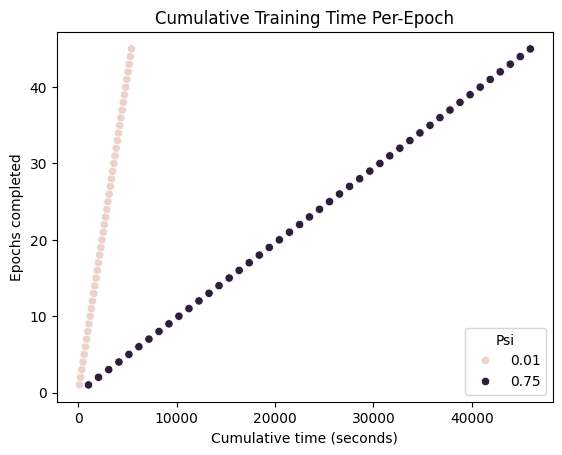

In [6]:
sns.scatterplot(runtimes, x='cumtime', y='epoch', hue='Psi')
plt.xlabel('Cumulative time (seconds)')
plt.ylabel('Epochs completed')
plt.title('Cumulative Training Time Per-Epoch')
plt.savefig('cumulative_train_time.png')

# PPSE Performance per epoch

In [7]:
polySE_low_psi = []
for loc in listdir(low_psi_path):
    if loc.startswith('checkpoint'):
        epoch = int(loc.split('_')[-1]) + 1
        res = pd.read_csv(f'{low_psi_path}/{loc}/polySE_results_aggregations.csv')
        res['epoch'] = epoch
        res['Psi'] = low_psi
        polySE_low_psi.append(res)
polySE_low_psi = pd.concat(polySE_low_psi)

polySE_high_psi = []
for loc in listdir(high_psi_path):
    if loc.startswith('checkpoint'):
        epoch = int(loc.split('_')[-1]) + 1
        res = pd.read_csv(f'{high_psi_path}/{loc}/polySE_results_aggregations.csv')
        res['epoch'] = epoch
        res['Psi'] = high_psi
        polySE_high_psi.append(res)
polySE_high_psi = pd.concat(polySE_high_psi)
polySE = pd.concat([polySE_high_psi, polySE_low_psi])

groupby_cols = ['epoch', 'Psi']

warm_start = polySE.query('fake_triple_component != "both"')
warm_medians = []
for tup, subdf in warm_start.groupby(groupby_cols):
    warm_medians.append(list(tup) + [subdf.AUPRC.median()])
warm_medians = pd.DataFrame(warm_medians, columns=groupby_cols + ['median_AUPRC']).sort_values('epoch')
warm_medians['rolling_max'] = None
for psi in warm_medians.Psi.unique():
    cummax = warm_medians.query(f'Psi == {psi}').median_AUPRC.cummax()
    warm_medians['rolling_max'].loc[cummax.index] = cummax.values

cold_start = polySE.query('fake_triple_component == "both"')
cold_medians = []
for tup, subdf in cold_start.groupby(groupby_cols):
    cold_medians.append(list(tup) + [subdf.AUPRC.median()])
cold_medians = pd.DataFrame(cold_medians, columns=groupby_cols + ['median_AUPRC']).sort_values('epoch')
cold_medians['rolling_max'] = None
for psi in cold_medians.Psi.unique():
    cummax = cold_medians.query(f'Psi == {psi}').median_AUPRC.cummax()
    cold_medians['rolling_max'].loc[cummax.index] = cummax.values

/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_37558/56395436.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warm_medians['rolling_max'].loc[cummax.index] = cummax.values
/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_37558/56395436.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warm_medians['rolling_max'].loc[cummax.index] = cummax.values
/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_37558/56395436.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

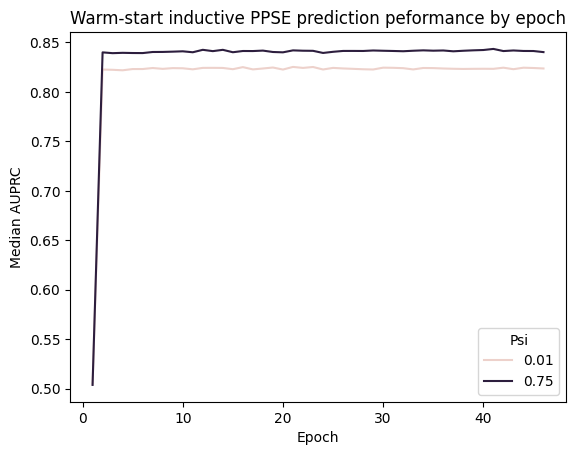

In [8]:
sns.lineplot(warm_medians, x='epoch', y='median_AUPRC', hue='Psi')
plt.xlabel('Epoch')
plt.ylabel('Median AUPRC')
plt.title('Warm-start inductive PPSE prediction peformance by epoch')
plt.savefig('AUPRC_by_epoch_warm_start.png')

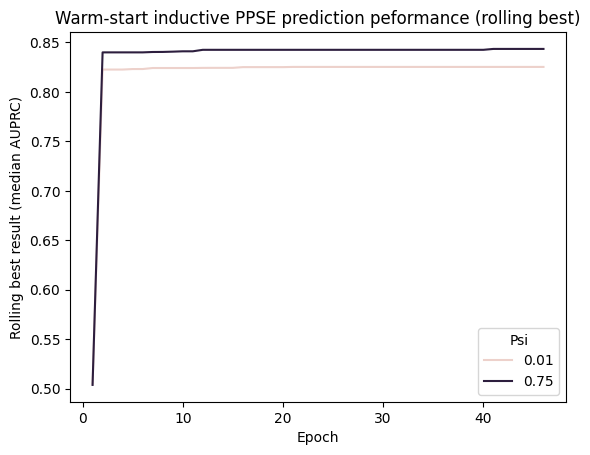

In [9]:
sns.lineplot(warm_medians, x='epoch', y='rolling_max', hue='Psi')
plt.xlabel('Epoch')
plt.ylabel('Rolling best result (median AUPRC)')
plt.title('Warm-start inductive PPSE prediction peformance (rolling best)')
plt.savefig('AUPRC_rolling_max_warm_start.png')

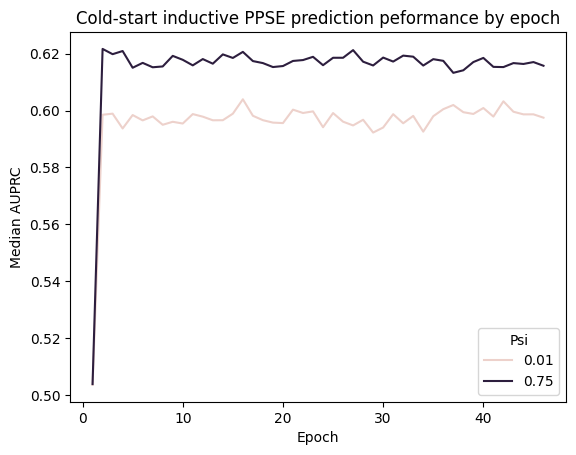

In [10]:
sns.lineplot(cold_medians, x='epoch', y='median_AUPRC', hue='Psi')
plt.xlabel('Epoch')
plt.ylabel('Median AUPRC')
plt.title('Cold-start inductive PPSE prediction peformance by epoch')
plt.savefig('AUPRC_by_epoch_cold_start.png')

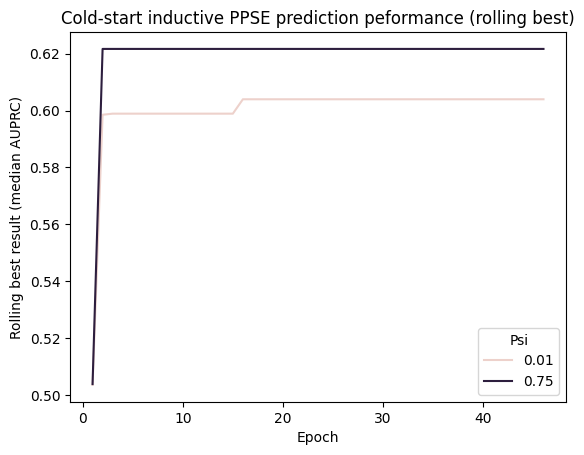

In [11]:
sns.lineplot(cold_medians, x='epoch', y='rolling_max', hue='Psi')
plt.xlabel('Epoch')
plt.ylabel('Rolling best result (median AUPRC)')
plt.title('Cold-start inductive PPSE prediction peformance (rolling best)')
plt.savefig('AUPRC_rolling_max_cold_start.png')

In [12]:
x = warm_medians.query('Psi == 0.01').rolling_max.reset_index(drop=True)
y = warm_medians.query('Psi == 0.75').rolling_max.reset_index(drop=True)
y - x

0    -0.001094
1     0.017361
2     0.017361
3     0.017361
4     0.016862
5     0.016839
6     0.016198
7     0.016264
8     0.016542
9     0.016895
10    0.016895
11     0.01827
12    0.018232
13    0.018232
14    0.018232
15    0.017501
16    0.017501
17    0.017501
18    0.017501
19    0.017501
20    0.017294
21    0.017294
22    0.017294
23    0.017294
24    0.017294
25    0.017294
26    0.017294
27    0.017294
28    0.017294
29    0.017294
30    0.017294
31    0.017294
32    0.017294
33    0.017294
34    0.017294
35    0.017294
36    0.017294
37    0.017294
38    0.017294
39    0.017294
40    0.018198
41    0.018198
42    0.018198
43    0.018198
44    0.018198
45    0.018198
Name: rolling_max, dtype: object

In [13]:
x = cold_medians.query('Psi == 0.01').rolling_max.reset_index(drop=True)
y = cold_medians.query('Psi == 0.75').rolling_max.reset_index(drop=True)
y - x

0     0.000302
1     0.023144
2     0.022759
3     0.022759
4     0.022759
5     0.022759
6     0.022759
7     0.022759
8     0.022759
9     0.022759
10    0.022759
11    0.022759
12    0.022759
13    0.022759
14    0.022759
15    0.017705
16    0.017705
17    0.017705
18    0.017705
19    0.017705
20    0.017705
21    0.017705
22    0.017705
23    0.017705
24    0.017705
25    0.017705
26    0.017705
27    0.017705
28    0.017705
29    0.017705
30    0.017705
31    0.017705
32    0.017705
33    0.017705
34    0.017705
35    0.017705
36    0.017705
37    0.017705
38    0.017705
39    0.017705
40    0.017705
41    0.017705
42    0.017705
43    0.017705
44    0.017705
45    0.017705
Name: rolling_max, dtype: object

In [14]:
warm_medians

,epoch,Psi,median_AUPRC,rolling_max
0,1,0.01,0.504864,0.504864
1,1,0.75,0.503771,0.503771
2,2,0.01,0.822601,0.822601
3,2,0.75,0.839962,0.839962
4,3,0.01,0.822348,0.822601
...,...,...,...,...
87,44,0.75,0.841385,0.843452
88,45,0.01,0.824157,0.825253
89,45,0.75,0.841334,0.843452
90,46,0.01,0.823688,0.825253


In [15]:
# Warm low psi
0.822601/0.825253

0.9967864400371765

In [16]:
# Warm high psi
0.839934/0.843385


0.9959081558244455

In [17]:
cold_medians.query('Psi != 0.01')

,epoch,Psi,median_AUPRC,rolling_max
1,1,0.75,0.503841,0.503841
3,2,0.75,0.621669,0.621669
5,3,0.75,0.619821,0.621669
7,4,0.75,0.620929,0.621669
9,5,0.75,0.615049,0.621669
11,6,0.75,0.616763,0.621669
13,7,0.75,0.615219,0.621669
15,8,0.75,0.615507,0.621669
17,9,0.75,0.619223,0.621669
19,10,0.75,0.617843,0.621669


In [18]:
# Cold low psi
0.598524/0.603964

0.9909928406328854

In [19]:
# Cold high psi
0.62154/0.62154

1.0

In [20]:
data = []
for tup, subdf in warm_start.groupby(['Psi', 'epoch']):
    data.append(list(tup) + [subdf.AUROC.median()])

pd.DataFrame(data, columns=['psi', 'epoch', 'median_AUROC']).sort_values('median_AUROC', ascending=False)

,psi,epoch,median_AUROC
86,0.75,41,0.872634
74,0.75,29,0.872505
57,0.75,12,0.872376
80,0.75,35,0.872032
63,0.75,18,0.872007
...,...,...,...
34,0.01,35,0.850277
39,0.01,40,0.850231
38,0.01,39,0.849875
0,0.01,1,0.500737


In [21]:
data = []
for tup, subdf in cold_start.groupby(['Psi', 'epoch']):
    data.append(list(tup) + [subdf.AUROC.median()])

pd.DataFrame(data, columns=['psi', 'epoch', 'median_AUROC']).sort_values('median_AUROC', ascending=False)

,psi,epoch,median_AUROC
47,0.75,2,0.638303
49,0.75,4,0.637327
54,0.75,9,0.635812
59,0.75,14,0.635677
48,0.75,3,0.635532
...,...,...,...
28,0.01,29,0.603994
3,0.01,4,0.603306
33,0.01,34,0.603049
0,0.01,1,0.499558
